# Heart Failure Prediction
Analyze risk factors for heart failure and model the probability of heart failure for an individual.

In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os

# display all of the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

%matplotlib inline


In [2]:
# Set Constants
RANDOM_STATE = 42


In [3]:
# Read data into data frame
data_path = os.path.join('Data', 'heart_raw.csv')
df = pd.read_csv(data_path)

print(df.shape)
df.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
col_names = df.columns
col_names

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


918 rows of data
12 features (11 predictors and col 12 as 0,1 heart disease)


In [7]:
# check for null values
df.isnull().any()
#df.isnull().sum()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

Great! No null values

In [8]:
# Check for duplicate rows (redundant data)
duplicated_rows_check = df.duplicated()  #true/false for each row
duplicate_rows = df[duplicated_rows_check]
duplicate_rows.shape


(0, 12)

Great, no duplicates to remove!

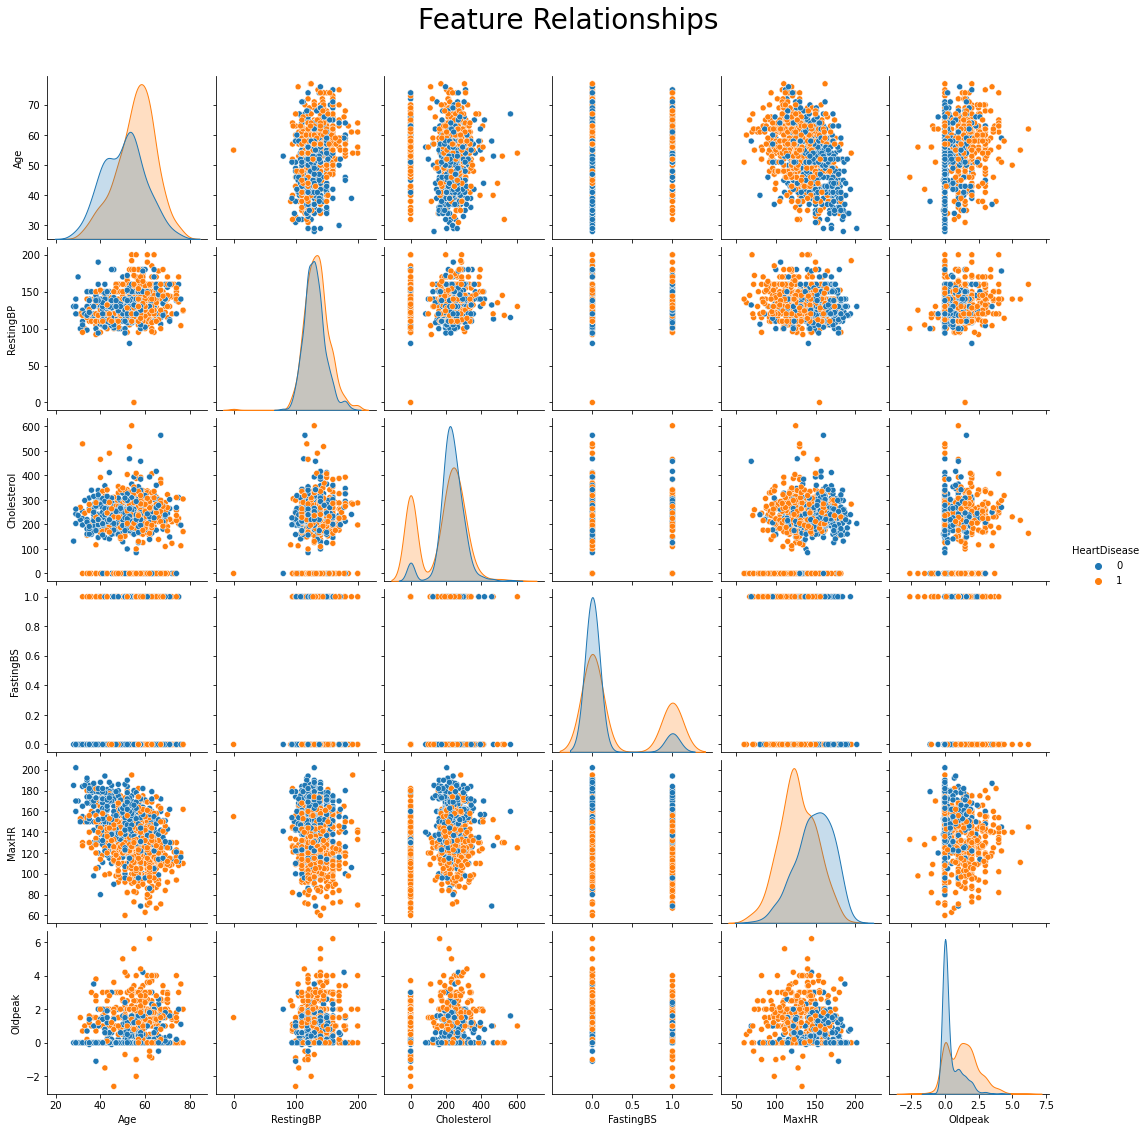

In [9]:
# Plot scatter plot matrix
# only plots numeric values
# pd.plotting.scatter_matrix(df)
sns.pairplot(df, hue = 'HeartDisease')
plt.suptitle('Feature Relationships', y = 1.05, size=28)
plt.savefig(os.path.join('Images', 'EDA_ScatterplotMatrix_NumericOnly.png'))


In [10]:
# Find numeric and categorical cols
def find_num_and_cat_cols(df):
    cat_cols = [col for col in df.columns if df[col].dtype == np.object]
    num_cols = [col for col in df.columns if df[col].dtype != np.object]
    assert len(cat_cols) + len(num_cols) == df.shape[1]
    return (cat_cols, num_cols)

In [11]:
cat_cols , num_cols = find_num_and_cat_cols(df)
print(cat_cols)
print(num_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


/var/folders/nq/r5qd0pvd1fv5ysfhyhp4lh4c0000gp/T/ipykernel_11477/1614741944.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_cols = [col for col in df.columns if df[col].dtype == np.object]
/var/folders/nq/r5qd0pvd1fv5ysfhyhp4lh4c0000gp/T/ipykernel_11477/1614741944.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num_cols = [col for col in df.columns if df[col].dtype != np.object]


In [12]:
num_numeric_cols = len(num_cols)

# # define subplot grid
# fig = plt.figure(figsize=[25,8])

# #plt.subplots_adjust(hspace = 0.5)
# #fig.suptitle("Outlier Detection", fontsize=18, y=0.95)
# #fig, axs = plt.subplots(1, num_numeric_cols, constrained_layout=True, figsize=[25,8])

# # fig, axs = plt.subplots(1, num_numeric_cols, figsize=[25,8])
# # fig.suptitle("Outlier Detection", fontsize=18, y=0.95)
# # for n, ax in enumerate(axs.flat):
# #     col_name = num_cols[n]
# #     ax.boxplot(df[col_name])
# #     ax.set_title(col_name)
# #     ax.set_xlabel("")


# for n, column in enumerate(num_cols):
#     ax = fig.add_subplot(1, num_numeric_cols, n + 1)
#     ax.boxplot(df[column])
#     ax.set_title(column)
#     ax.set_xlabel("")
    

# #fig.tight_layout()
# #fig.subplots(constrained_layout=True)
# fig.savefig(os.path.join('Images', 'OutlierDetection.png'), bbox_inches='tight')
# #fig.savefig(os.path.join('Images', 'OutlierDetection.png'))   
    

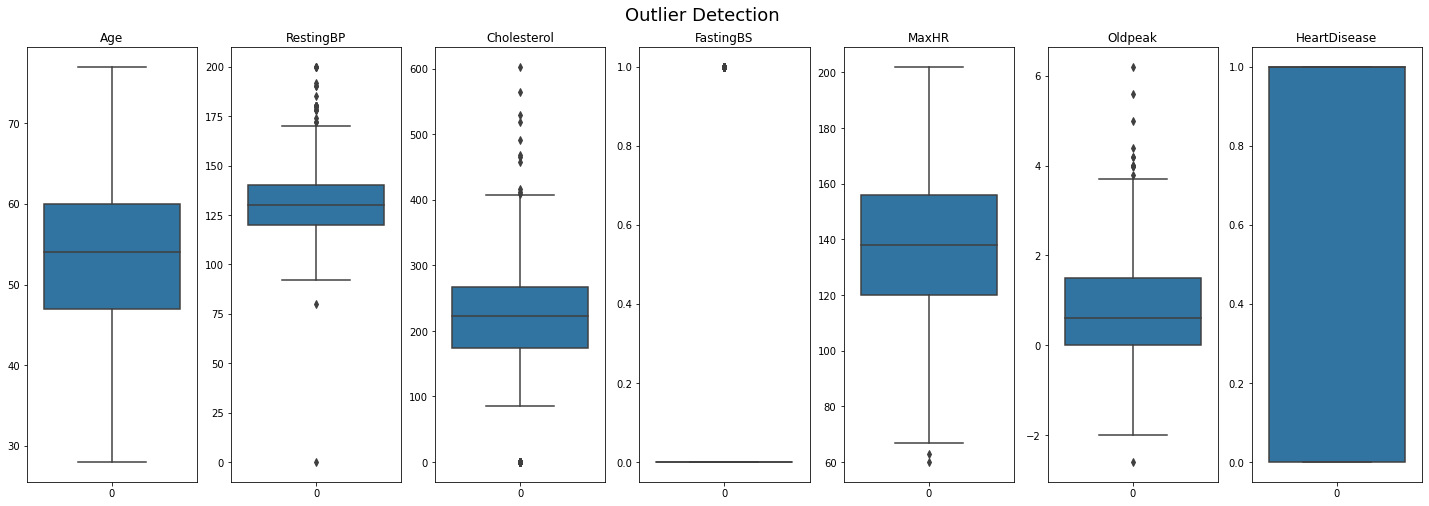

In [13]:
fig = plt.figure(figsize=[25,8])
for n, column in enumerate(num_cols):
    ax = fig.add_subplot(1, num_numeric_cols, n + 1)
    sns.boxplot(data = df[column], ax = ax)
    ax.set_title(column)
    ax.set_xlabel("")
fig.suptitle("Outlier Detection", fontsize=18, y=0.95)
fig.savefig(os.path.join('Images', 'OutlierDetection.png'), bbox_inches='tight')

Strange, resting BP or 0 and cholesterol of 0.  Drop these.

Text(0.5, 0.95, 'Outlier Detection')

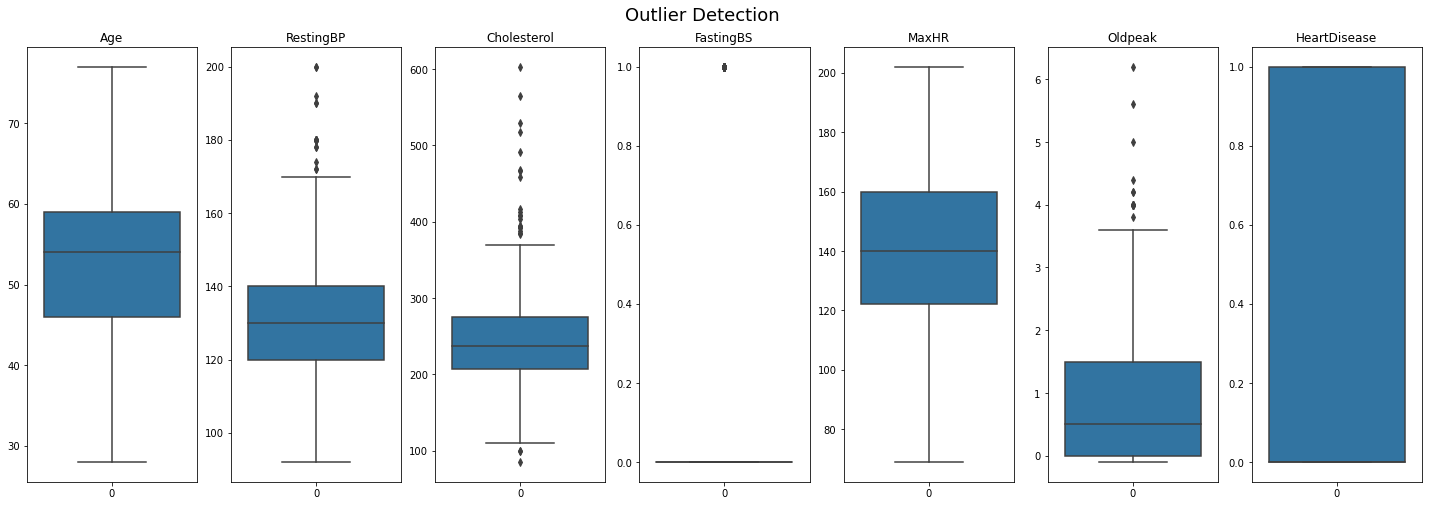

In [14]:
df.drop(df[df['RestingBP'] == 0].index, inplace = True)
df.drop(df[df['Cholesterol'] == 0].index, inplace = True)

fig = plt.figure(figsize=[25,8])
for n, column in enumerate(num_cols):
    ax = fig.add_subplot(1, num_numeric_cols, n + 1)
    sns.boxplot(data = df[column], ax = ax)
    ax.set_title(column)
    ax.set_xlabel("")
fig.suptitle("Outlier Detection", fontsize=18, y=0.95)


In [15]:
# Find cardinality of categorical columns
cardinality = [len(df[col].unique()) for col in cat_cols]
cardinality

[2, 4, 3, 2, 3]

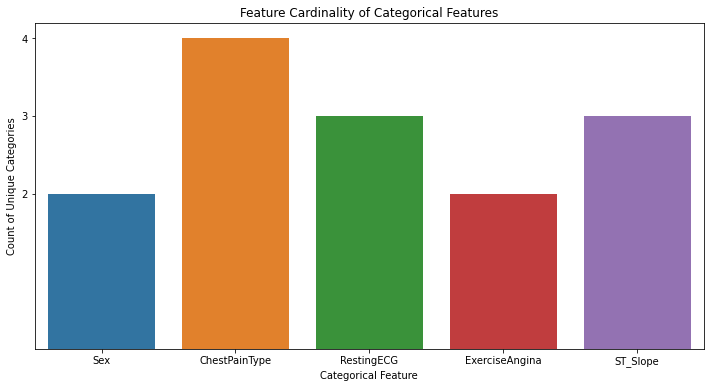

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x = cat_cols, y = cardinality)
ax.set_xlabel('Categorical Feature')
ax.set_ylabel('Count of Unique Categories')
ax.set_title('Feature Cardinality of Categorical Features')
ax.set_yticks(np.arange(min(cardinality), max(cardinality)+1, 1.0))
fig.savefig(os.path.join('Images', 'EDA_Cardinality.png'))

In [17]:
def convert_cat_to_numeric(dataframe):
    new_dataframe = dataframe.copy(deep = True)
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == np.object]
    for col in cat_cols:
        new_dataframe[col] = pd.Categorical(dataframe[col]).codes
    return new_dataframe

/var/folders/nq/r5qd0pvd1fv5ysfhyhp4lh4c0000gp/T/ipykernel_11477/494366137.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == np.object]


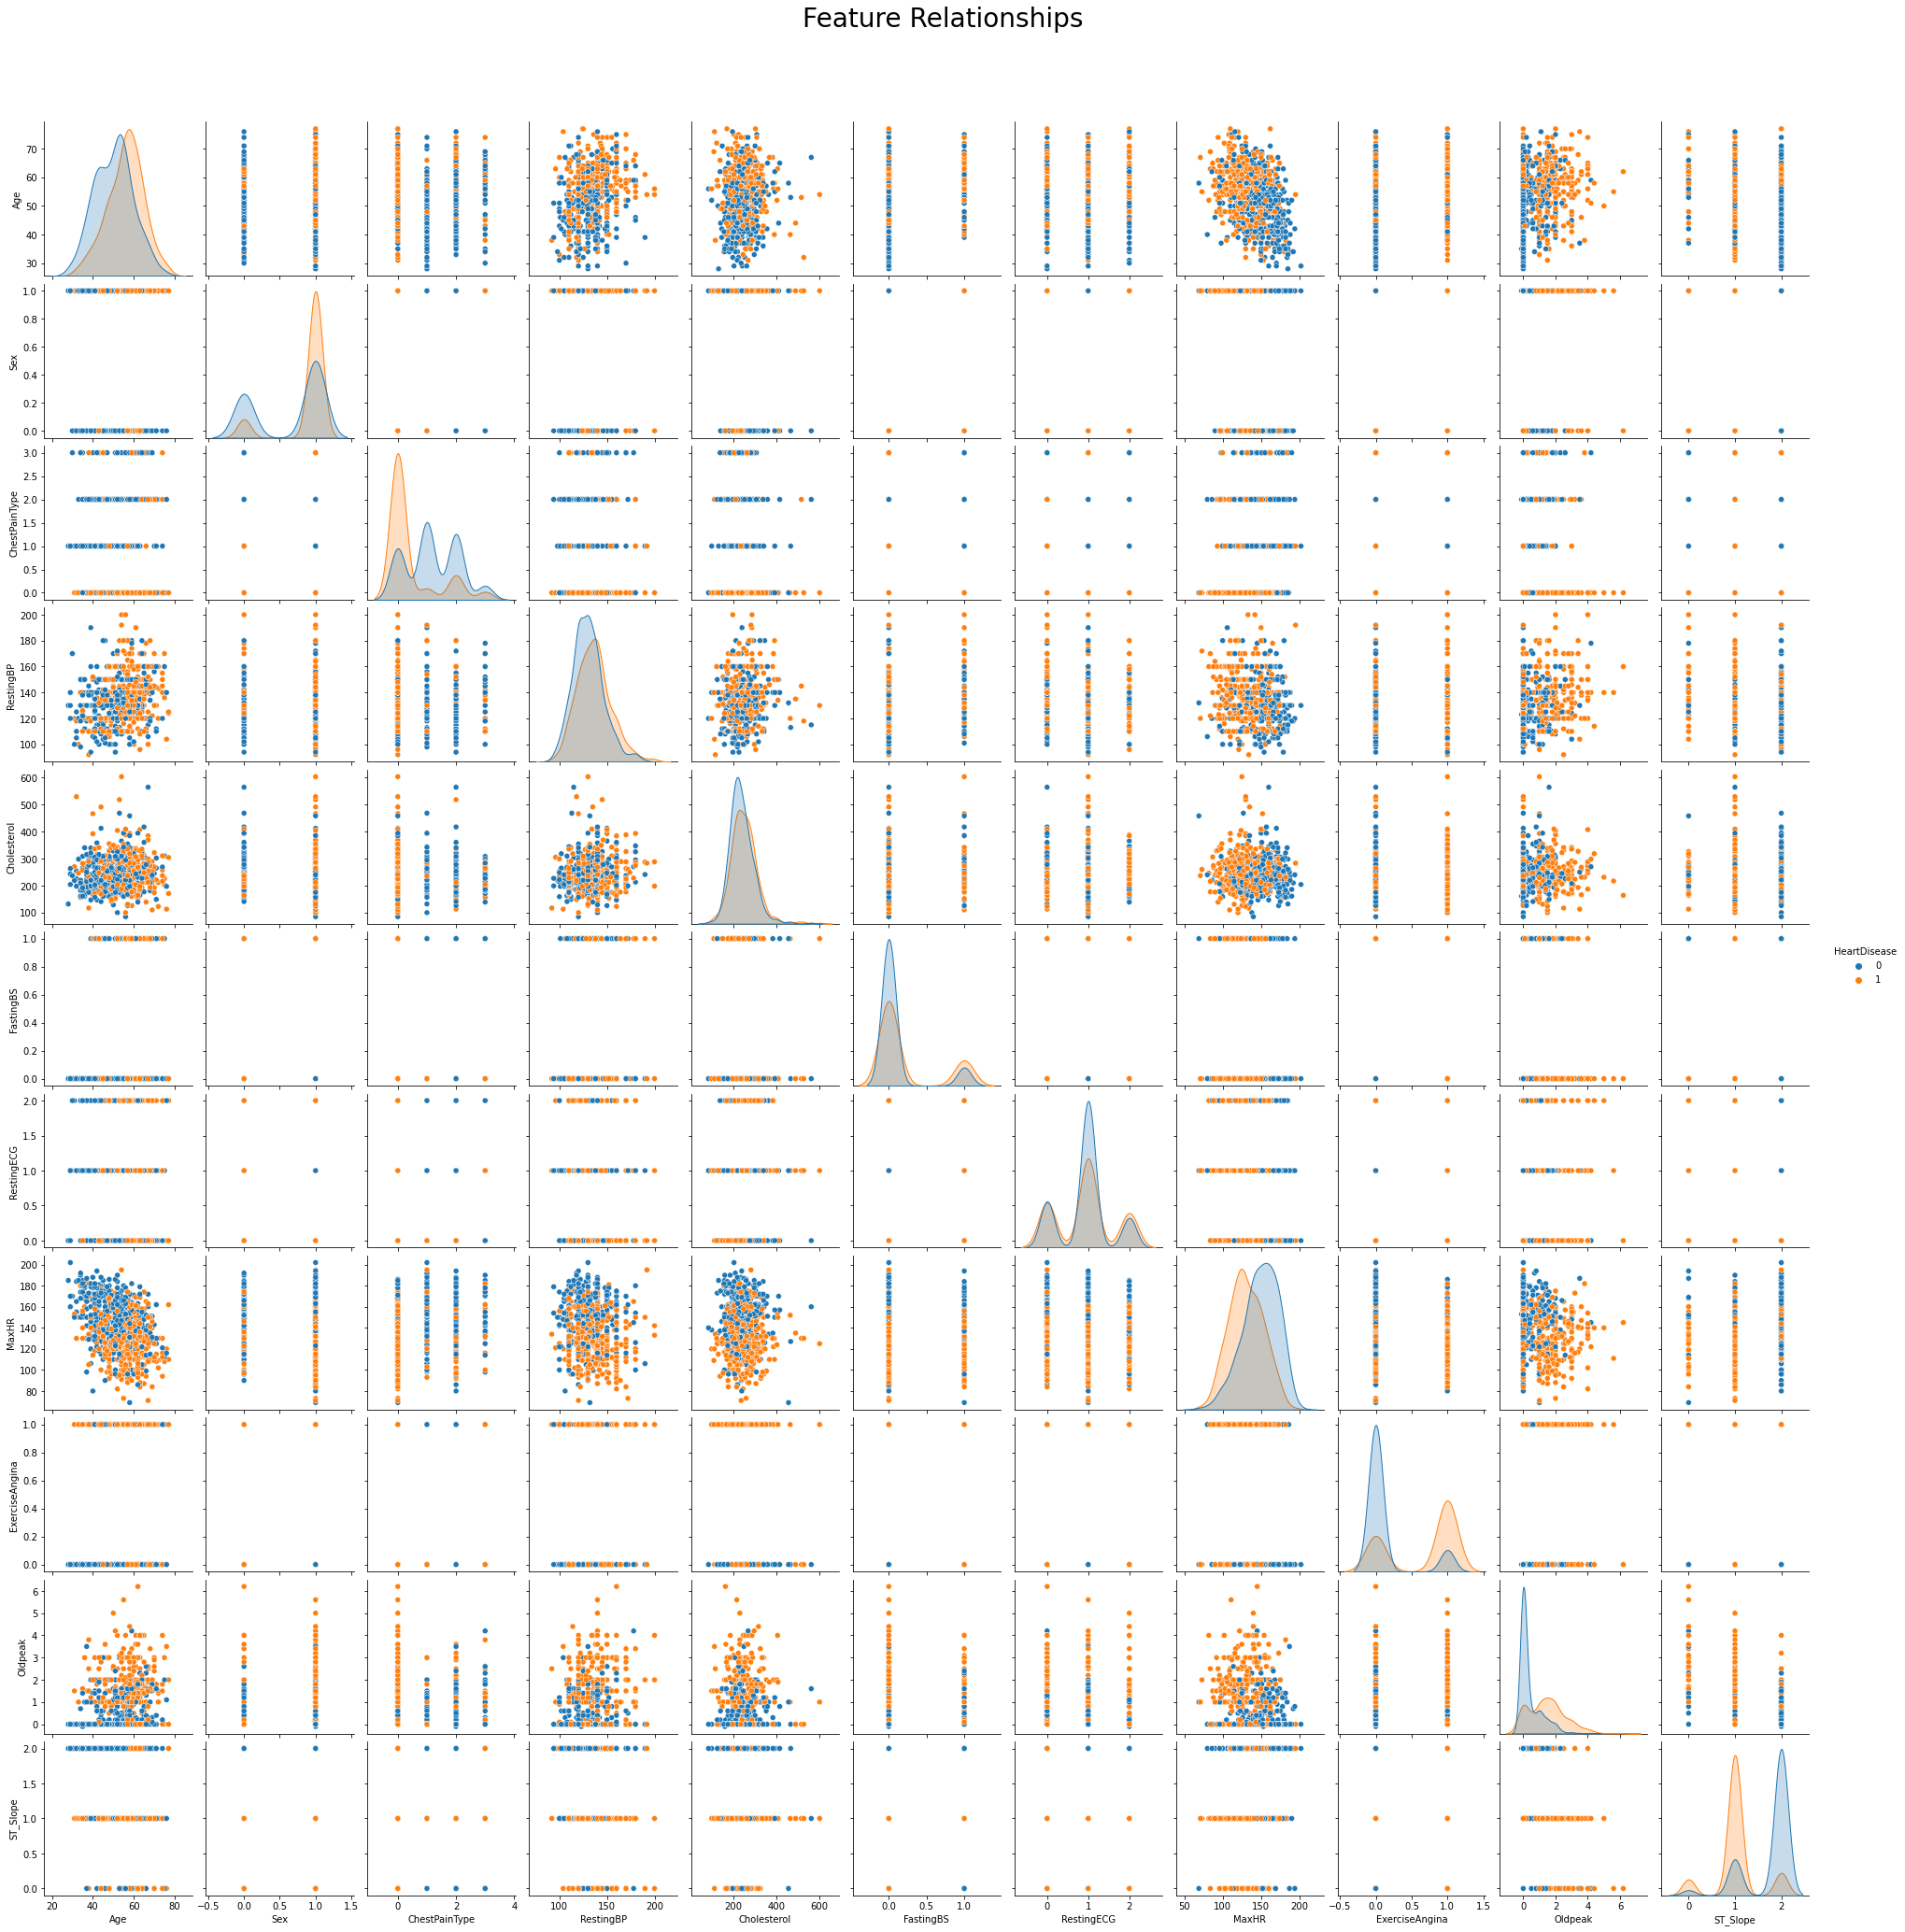

In [18]:
df_numeric = convert_cat_to_numeric(df)
sns.pairplot(df_numeric, hue = 'HeartDisease')
plt.suptitle('Feature Relationships', y = 1.05, size=28)
plt.savefig(os.path.join('Images', 'EDA_ScatterplotMatrix.png'))


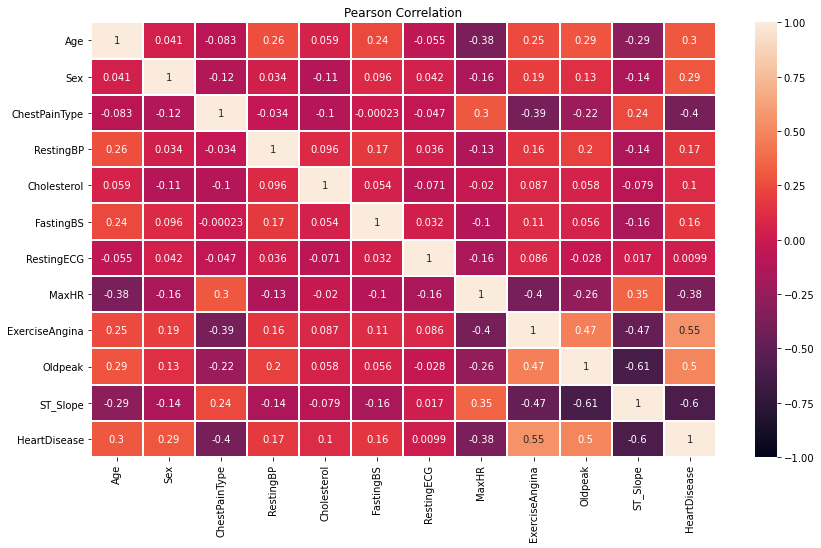

In [19]:
pearsonCorr = df_numeric.corr(method='pearson')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin = -1, vmax = 1, annot = True, linewidth = 0.1)
plt.title("Pearson Correlation")
plt.savefig(os.path.join('Images', 'Pearson_Correlation.png'))


In [20]:
# Variance Inflation Factor (VIF) for correlated features
# VIFs over 10 can be problematic. Caution when VIF over 5.
vif_data = pd.DataFrame()
vif_data["feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(len(df_numeric.columns))]

vif_data

,feature,VIF
0,Age,32.473409
1,Sex,4.462562
2,ChestPainType,2.317030
3,RestingBP,54.723330
4,Cholesterol,17.722887
5,FastingBS,1.313163
6,RestingECG,3.196918
7,MaxHR,30.455911
8,ExerciseAngina,2.787416
9,Oldpeak,3.074552


In [21]:
# Drop RestingBP and Age b/c highest VIF and low correlation
vif2_data = pd.DataFrame()
df_numeric2 = df_numeric.drop(columns=['RestingBP', 'Age'])
vif2_data["feature"] = df_numeric2.columns
vif2_data["VIF"] = [variance_inflation_factor(df_numeric2.values, i) for i in range(len(df_numeric2.columns))]

vif2_data

,feature,VIF
0,Sex,4.378796
1,ChestPainType,2.269470
2,Cholesterol,14.933645
3,FastingBS,1.261079
4,RestingECG,3.071725
5,MaxHR,23.940939
6,ExerciseAngina,2.715001
7,Oldpeak,2.832941
8,ST_Slope,11.644549
9,HeartDisease,3.776834


In [22]:
def one_hot_encode(df, cols):
    df_copy = df.copy()
    for col in cols:
        onehot = pd.get_dummies(df_copy[col], prefix = col)
        new_df = pd.concat([onehot, df_copy], axis = 1)
        new_df.drop([col], axis = 1, inplace = True)
        df_copy = new_df
    return df_copy

In [23]:
new_df = one_hot_encode(df, ['Sex', 'ExerciseAngina'])
new_df

,ExerciseAngina_N,ExerciseAngina_Y,Sex_F,Sex_M,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease
0,1,0,0,1,40,ATA,140,289,0,Normal,172,0.0,Up,0
1,1,0,1,0,49,NAP,160,180,0,Normal,156,1.0,Flat,1
2,1,0,0,1,37,ATA,130,283,0,ST,98,0.0,Up,0
3,0,1,1,0,48,ASY,138,214,0,Normal,108,1.5,Flat,1
4,1,0,0,1,54,NAP,150,195,0,Normal,122,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,0,1,45,TA,110,264,0,Normal,132,1.2,Flat,1
914,1,0,0,1,68,ASY,144,193,1,Normal,141,3.4,Flat,1
915,0,1,0,1,57,ASY,130,131,0,Normal,115,1.2,Flat,1
916,1,0,1,0,57,ATA,130,236,0,LVH,174,0.0,Flat,1


In [24]:
cat_cols, num_cols = find_num_and_cat_cols(df_numeric)
cat_cols

/var/folders/nq/r5qd0pvd1fv5ysfhyhp4lh4c0000gp/T/ipykernel_11477/1614741944.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_cols = [col for col in df.columns if df[col].dtype == np.object]
/var/folders/nq/r5qd0pvd1fv5ysfhyhp4lh4c0000gp/T/ipykernel_11477/1614741944.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num_cols = [col for col in df.columns if df[col].dtype != np.object]


[]

In [25]:
df_numeric

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [26]:
data_path = os.path.join('Data', 'heart_cleaned.csv')
df_numeric.to_csv(data_path)

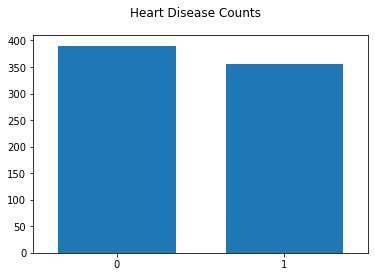

In [27]:
# Check for balance in prediction class variable
bins = np.arange(0, 1 + 1.5) - 0.5

fig, ax = plt.subplots()
_ = ax.hist(df_numeric['HeartDisease'], bins, rwidth = 0.7)
ax.set_xticks(bins + 0.5)
ax.set_xlim(-0.5, 1.5)
fig.suptitle('Heart Disease Counts')

fig.savefig(os.path.join('Images', 'EDA_TargetCounts.png'))

Fairly balanced target column.
Accuracy will be a fair measure.